<div align="center">
    <font size=10>TME 3: Descente de gradient, régression
    </font>
</div>
<br/>
<div align="right">
    <font size=3>SERRAF Dan & KOSTADINOVIC Nikola
    </font>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mltools import plot_data, plot_frontiere, make_grid, gen_arti

def mse(w,x,y):
    y = y.reshape(-1,1); w = w.reshape(-1,1); x = x.reshape(y.shape[0],w.shape[0])
    return pow((x @ w - y),2)

def mse_grad(w,x,y):
    y = y.reshape(-1,1); w = w.reshape(-1,1); x = x.reshape(y.shape[0],w.shape[0])
    return 2 * x * (x @ w - y)

def reglog(w,x,y):
    y = y.reshape(-1,1); w = w.reshape(-1,1); x = x.reshape(y.shape[0],w.shape[0])
    return np.log(1 + np.exp(-y * (x @ w)))

def reglog_grad(w,x,y):
    y = y.reshape(-1,1); w = w.reshape(-1,1); x = x.reshape(y.shape[0],w.shape[0])
    res = np.exp(y * (x @ w))
    return (-x * y *res)/(1 + res)



In [2]:
def grad_check(f,f_grad,d=1,eps=0.05,N=100):
    x = np.random.rand(N,d)
    y = np.random.choice([-1,1],N)
    w = np.zeros((N,1))
    np.shuffle(x)
    return f(w,x,y) + [(x - xi)]

def grad_check(f, f_grad, eps = 0.05, N = 100):
    """ Tire au hasard N points de dimension 1 et vérifie sur ces N points 
        le calcul du gradient.
        @return : float, moyenne des différences de gradient pour les 2 méthodes
        @return : pd.DataFrame, DataFrame des différences, sert pour l'affichage
    """
    # --- Tirage aléatoire des exemples de X, w et y
    
    x = np.array( [rd.randint(0,100) for i in range(N)] ).reshape(-1,1)
    w = np.array([rd.randint(1,10)])
    y = np.array(rd.choice([-1,1]))
    
    # Dictionnaire servant à stocker les différentes valeurs de gradient (pour f et Taylor)
    grad_values = dict()
    
    # diff : moyenne des différences entre les 1 méthodes de calcul du gradient
    diff = 0
    
    for i in range(N):
        # Calcul des gradients par f et par DL de Taylor
        grad_approx = f_grad(w + eps, x[i], y)
        grad_dl = ( f( w + eps, x[i], y ) - f( w, x[i], y ) ) / eps
        
        # Mise à jour du dictionnaire et de la moyenne des différences
        grad_values[i] = {f.__name__ : "%.1f" % grad_approx[0][0], 'Taylor' : "%.1f" % grad_dl[0][0]}
        diff += grad_approx - grad_dl
        
    return diff / N, pandas.DataFrame.from_dict(grad_values)

In [3]:
def check_fonctions():
    ## On fixe la seed de l'aléatoire pour vérifier les fonctions
    np.random.seed(0)
    datax, datay = gen_arti(epsilon=0.1)
    wrandom = np.random.randn(datax.shape[1],1)
    assert(np.isclose(mse(wrandom,datax,datay).mean(),0.54731,rtol=1e-4))
    assert(np.isclose(reglog(wrandom,datax,datay).mean(), 0.57053,rtol=1e-4))
    assert(np.isclose(mse_grad(wrandom,datax,datay).mean(),-1.43120,rtol=1e-4))
    assert(np.isclose(reglog_grad(wrandom,datax,datay).mean(),-0.42714,rtol=1e-4))
    np.random.seed()




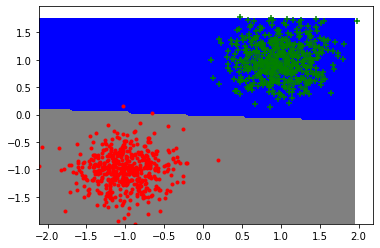

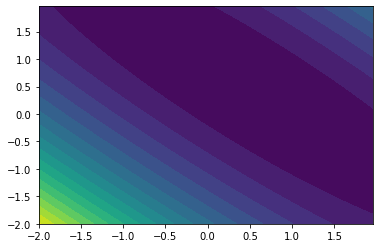

In [4]:
if __name__=="__main__":
    ## Tirage d'un jeu de données aléatoire avec un bruit de 0.1
    datax, datay = gen_arti(epsilon=0.1)
    ## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
    grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)
    
    plt.figure()
    ## Visualisation des données et de la frontière de décision pour un vecteur de poids w
    w  = np.random.randn(datax.shape[1],1)
    plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
    plot_data(datax,datay)

    ## Visualisation de la fonction de coût en 2D
    plt.figure()
    plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)
    

In [5]:
def plot_data(data,labels=None):
    """
    Affiche des donnees 2D
    :param data: matrice des donnees 2d
    :param labels: vecteur des labels (discrets)
    :return:
    """
    if labels is not None:
        labels = labels.reshape(-1)
    cols,marks = ["red", "green", "blue", "orange", "black", "cyan"],[".","+","*","o","x","^"]
    if labels is None:
        plt.scatter(data[:,0],data[:,1],marker="x")
        return
    for i,l in enumerate(sorted(list(set(labels.flatten())))):
        plt.scatter(data[labels==l,0],data[labels==l,1],c=cols[i],marker=marks[i])

def plot_frontiere(data,f,step=20):
    """ Trace un graphe de la frontiere de decision de f
    :param data: donnees
    :param f: fonction de decision
    :param step: pas de la grille
    :return:
    """
    grid,x,y=make_grid(data=data,step=step)
    plt.contourf(x,y,f(grid).reshape(x.shape),colors=('gray','blue'),levels=[-1,0,1])

def make_grid(data=None,xmin=-5,xmax=5,ymin=-5,ymax=5,step=20):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :param data: pour calcluler les bornes du graphe
    :param xmin: si pas data, alors bornes du graphe
    :param xmax:
    :param ymin:
    :param ymax:
    :param step: pas de la grille
    :return: une matrice 2d contenant les points de la grille
    """
    if data is not None:
        xmax, xmin, ymax, ymin = np.max(data[:,0]),  np.min(data[:,0]), np.max(data[:,1]), np.min(data[:,1])
    x, y =np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step), np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y

def gen_arti(centerx=1,centery=1,sigma=0.1,nbex=1000,data_type=0,epsilon=0.02):
    """ Generateur de donnees,
        :param centerx: centre des gaussiennes
        :param centery:
        :param sigma: des gaussiennes
        :param nbex: nombre d'exemples
        :param data_type: 0: melange 2 gaussiennes, 1: melange 4 gaussiennes, 2:echequier
        :param epsilon: bruit dans les donnees
        :return: data matrice 2d des donnnes,y etiquette des donnnees
    """
    if data_type==0:
        #melange de 2 gaussiennes
        xpos=np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),nbex//2)
        xneg=np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),nbex//2)
        data=np.vstack((xpos,xneg))
        y=np.hstack((np.ones(nbex//2),-np.ones(nbex//2)))
        
    if data_type==1:
        #melange de 4 gaussiennes
        xpos=np.vstack((np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),nbex//4),np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),nbex//4)))
        xneg=np.vstack((np.random.multivariate_normal([-centerx,centerx],np.diag([sigma,sigma]),nbex//4),np.random.multivariate_normal([centerx,-centerx],np.diag([sigma,sigma]),nbex//4)))
        data=np.vstack((xpos,xneg))
        y=np.hstack((np.ones(nbex//2),-np.ones(nbex//2)))

    if data_type==2:
        #echiquier
        data=np.reshape(np.random.uniform(-4,4,2*nbex),(nbex,2))
        y=np.ceil(data[:,0])+np.ceil(data[:,1])
        y=2*(y % 2)-1
        
    # un peu de bruit
    data[:,0]+=np.random.normal(0,epsilon,nbex)
    data[:,1]+=np.random.normal(0,epsilon,nbex)
    # on mélange les données
    idx = np.random.permutation((range(y.size)))
    data=data[idx,:]
    y=y[idx]
    return data,y.reshape(-1, 1)


In [6]:
def descente_gradient(datax,datay,f_loss,f_grad,eps,iter,k=20,mode="batch"):
    
    w = np.zeros((datax.shape[1],1))
    y = datay.reshape(-1,1)
    x = datax.reshape(y.shape[0],w.shape[0])
   
    all_ind = range(y.shape[0])
    all_w = [w]
    all_l = []
    
    for i in range(1,iter):
        
        if mode == "batch" :
            w = w - eps * np.mean(f_grad(w,x,y),axis=0).reshape(datax.shape[1],1)
        elif mode == "mini_batch" :
            ind = np.random.shuffle(all_ind)[:k]
            w = w - eps * np.mean(f_grad(w,x[ind,:],y[ind]),axis=0).reshape(datax.shape[1],1)
        else :#if mode == "stochastique" :
            ind = np.random.randint(0,y.shape[0])
            w = w - eps * np.mean(f_grad(w,x[ind,:],y[ind]),axis=0).reshape(datax.shape[1],1)
      
        all_w.append(w)
        all_l.append(f_loss(w,x,y))
        
    return w,all_w,all_l

In [7]:
datax, datay = gen_arti(epsilon=0.1)
grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)
w = np.random.rand(datax.shape[1])

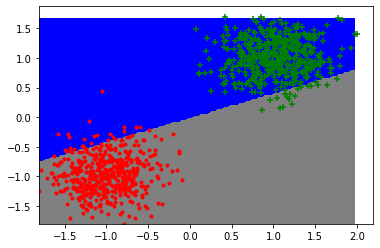

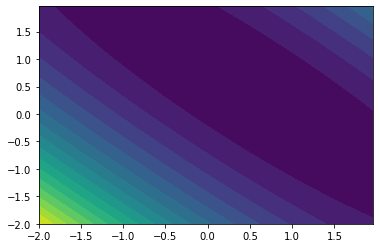

In [8]:

w  = np.random.randn(datax.shape[1],1)
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)

## Visualisation de la fonction de coût en 2D
plt.figure()
plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)
 
def display_frontiere(f_loss = mse, f_grad = mse_grad,iter=1000,k=20,mode="batch",epsilon=0.1,data_type=0):
    ## Tirage d'un jeu de données aléatoire avec un bruit de 0.1
    datax, datay = gen_arti(epsilon=epsilon,data_type=data_type)
    
    ## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
    grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)
    
    plt.figure()
    ## Visualisation des données et de la frontière de décision pour un vecteur de poids w
    w,_,_  = descente_gradient(datax,datay,f_loss,f_grad,epsilon,iter,k=20,mode="batch")
    
    plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
    plot_data(datax,datay)

    ## Visualisation de la fonction de coût en 2D
    plt.figure()
    plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)


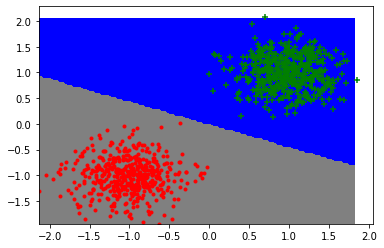

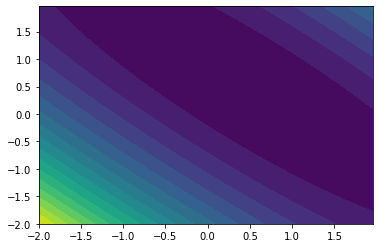

In [9]:

## Tirage d'un jeu de données aléatoire avec un bruit de 0.1
datax, datay = gen_arti(epsilon=0.1)
## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
## Visualisation des données et de la frontière de décision pour un vecteur de poids w
w  = np.random.randn(datax.shape[1],1)
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)

## Visualisation de la fonction de coût en 2D
plt.figure()
plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)


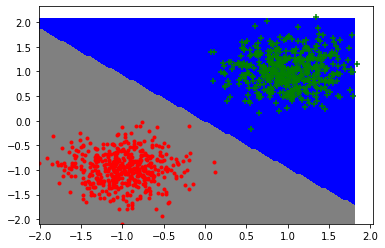

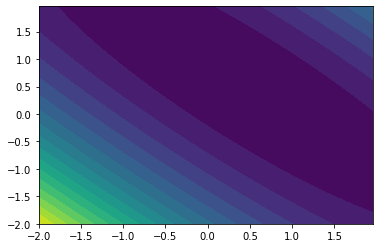

In [10]:
display_frontiere(f_loss=mse,f_grad=mse_grad,iter=1000,k=20,mode="batch",epsilon=0.1,data_type=0)